# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=54aabeb909211b32790d56d66d43b6e4&units=imperial&q='

In [6]:
cities

['avarua',
 'lebu',
 'bluff',
 'elat',
 'pacifica',
 'agaro',
 'busselton',
 'kawalu',
 'georgetown',
 'rikitea',
 'sitka',
 'chapleau',
 'butaritari',
 'jamestown',
 'geraldton',
 'broome',
 'ushuaia',
 'codrington',
 'albany',
 'craciunelu de jos',
 'norman wells',
 'taolanaro',
 'grand river south east',
 'saint-augustin',
 'port moresby',
 'dukat',
 'chokurdakh',
 'mataura',
 'alta floresta',
 'smithers',
 'moree',
 'dingle',
 'luwuk',
 'oranjemund',
 'brunico',
 'ostrovnoy',
 'bredasdorp',
 'mar del plata',
 'atuona',
 'beloha',
 'lompoc',
 'pocone',
 'sentyabrskiy',
 'holme',
 'guaymas',
 'esperance',
 'saskylakh',
 'cherskiy',
 'port elizabeth',
 'shimoda',
 'rognan',
 'xining',
 'puerto ayora',
 'candawaga',
 'palmer',
 'nishihara',
 'tommot',
 'qaqortoq',
 'hobart',
 'koumac',
 'sao joao da barra',
 'new norfolk',
 'hermanus',
 'yellowknife',
 'arica',
 'saleaula',
 'imeni poliny osipenko',
 'hithadhoo',
 'avera',
 'rocha',
 'illoqqortoormiut',
 'port alfred',
 'puerto cabezas

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
citicall=[]
lat=[]
lon=[]
maxtemp=[]
humidity=[]
cloudness=[]
windspeed=[]
country=[]
date=[]
for a in range(len(cities)):
    try:
        response=requests.get(query_url+cities[a]).json()
        citicall.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])    
        humidity.append(response['main']['humidity']) 
        cloudness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"Processing Record {a} | {cities[a]}")
        
    except KeyError:
        print(f"City not found. Skipping...")

print(f"Data Retrieval Complete") 

Processing Record 0 | avarua
Processing Record 1 | lebu
Processing Record 2 | bluff
Processing Record 3 | elat
Processing Record 4 | pacifica
Processing Record 5 | agaro
Processing Record 6 | busselton
Processing Record 7 | kawalu
Processing Record 8 | georgetown
Processing Record 9 | rikitea
Processing Record 10 | sitka
Processing Record 11 | chapleau
Processing Record 12 | butaritari
Processing Record 13 | jamestown
Processing Record 14 | geraldton
Processing Record 15 | broome
Processing Record 16 | ushuaia
Processing Record 17 | codrington
Processing Record 18 | albany
Processing Record 19 | craciunelu de jos
Processing Record 20 | norman wells
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | saint-augustin
Processing Record 24 | port moresby
Processing Record 25 | dukat
Processing Record 26 | chokurdakh
Processing Record 27 | mataura
Processing Record 28 | alta floresta
Processing Record 29 | smithers
Processing Record 30 | moree
Processing Record 31 

Processing Record 252 | constitucion
City not found. Skipping...
Processing Record 254 | srandakan
Processing Record 255 | buala
Processing Record 256 | catuday
Processing Record 257 | manduria
Processing Record 258 | krasnogorskiy
Processing Record 259 | hadejia
Processing Record 260 | krasnoslobodsk
City not found. Skipping...
Processing Record 262 | tautira
Processing Record 263 | yertarskiy
Processing Record 264 | jinan
City not found. Skipping...
Processing Record 266 | koubia
Processing Record 267 | caxito
Processing Record 268 | ixtapa
Processing Record 269 | port hardy
Processing Record 270 | husavik
Processing Record 271 | barra patuca
Processing Record 272 | sao filipe
Processing Record 273 | port blair
Processing Record 274 | vulcan
Processing Record 275 | point pedro
Processing Record 276 | upernavik
Processing Record 277 | savelugu
Processing Record 278 | saint helens
Processing Record 279 | ribeira brava
Processing Record 280 | mala vyska
Processing Record 281 | lahaina
C

Processing Record 502 | qasigiannguit
Processing Record 503 | lavrentiya
Processing Record 504 | omsukchan
Processing Record 505 | sechura
Processing Record 506 | olafsvik
Processing Record 507 | umba
Processing Record 508 | sanjwal
Processing Record 509 | ukiah
City not found. Skipping...
City not found. Skipping...
Processing Record 512 | mehamn
Processing Record 513 | new waterford
Processing Record 514 | marabba
Processing Record 515 | ust-nera
Processing Record 516 | kitob
Processing Record 517 | ilhabela
Processing Record 518 | manaure
City not found. Skipping...
Processing Record 520 | rafraf
Processing Record 521 | irtyshskiy
Processing Record 522 | sibu
City not found. Skipping...
Processing Record 524 | saldanha
Processing Record 525 | sarangarh
City not found. Skipping...
City not found. Skipping...
Processing Record 528 | matamoros
Processing Record 529 | kropotkin
Processing Record 530 | harqalah
Processing Record 531 | luau
Processing Record 532 | san patricio
Processing 

In [8]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -4.9667,
        "lon": 39.8333
    },
    "dt": 1612780187,
    "id": 153955,
    "main": {
        "feels_like": 84.54,
        "grnd_level": 1010,
        "humidity": 72,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 83.48,
        "temp_max": 83.48,
        "temp_min": 83.48
    },
    "name": "Micheweni",
    "sys": {
        "country": "TZ",
        "sunrise": 1612754767,
        "sunset": 1612799020
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 22,
        "speed": 14.94
    }
}


In [9]:
len(lat)

574

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather = {
    "City" : citicall,
    "Lat" : lat,
    "Lng" : lon,
    "Max_Temp" : maxtemp,
    "Humidity" : humidity,
    "Cloudiness" : cloudness,
    "Wind_Speed" : windspeed,
    "Country" : country,
    "Date" : date
}
weather_570 = pd.DataFrame(weather)
weather_570.to_csv('weather_574_.csv')
weather_570

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Avarua,-21.2078,-159.7750,78.80,94,40,4.61,CK,1612779975
1,Lebu,-37.6167,-73.6500,57.58,95,30,4.83,CL,1612779975
2,Bluff,-46.6000,168.3333,61.32,76,100,10.67,NZ,1612779975
3,Eilat,29.5581,34.9482,69.80,49,0,6.91,IL,1612779975
4,Pacifica,37.6138,-122.4869,48.99,93,90,4.36,US,1612779975
...,...,...,...,...,...,...,...,...,...
569,Ghugus,19.9333,79.1333,88.27,12,23,1.97,IN,1612780186
570,Morant Bay,17.8815,-76.4093,78.80,73,75,10.36,JM,1612780186
571,Kamaishi,39.2667,141.8833,23.00,54,20,12.66,JP,1612780186
572,Balyqshy,47.0667,51.8667,14.00,48,0,11.18,KZ,1612780186


In [11]:
weather_570.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Avarua,-21.2078,-159.7750,78.80,94,40,4.61,CK,1612779975
1,Lebu,-37.6167,-73.6500,57.58,95,30,4.83,CL,1612779975
2,Bluff,-46.6000,168.3333,61.32,76,100,10.67,NZ,1612779975
3,Eilat,29.5581,34.9482,69.80,49,0,6.91,IL,1612779975
4,Pacifica,37.6138,-122.4869,48.99,93,90,4.36,US,1612779975


In [30]:
len(weather_570['City'].unique())
#No repeated cities in the list

574

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_570.describe()
#Data Inspection
#Maximum Humidity = 100%. This indicates that no cities in this dataset have humidity >100%.

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.332789,14.457793,49.417997,70.759582,52.674216,8.465557,1.612780e+09
std,33.013206,88.525731,33.443476,21.923985,39.134709,6.292712,9.050423e+01
min,-54.800000,-175.200000,-43.600000,11.000000,0.000000,0.160000,1.612780e+09
25%,-6.291475,-64.687725,24.277500,60.000000,10.000000,3.675000,1.612780e+09
50%,25.526550,19.793850,61.810000,76.000000,56.500000,6.910000,1.612780e+09
75%,48.354250,85.414350,77.000000,87.000000,90.000000,11.500000,1.612780e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,42.570000,1.612780e+09


In [13]:
#Double check
weather_570dhu=weather_570[weather_570["Humidity"]<=100]
weather_570dhu.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.332789,14.457793,49.417997,70.759582,52.674216,8.465557,1.612780e+09
std,33.013206,88.525731,33.443476,21.923985,39.134709,6.292712,9.050423e+01
min,-54.800000,-175.200000,-43.600000,11.000000,0.000000,0.160000,1.612780e+09
25%,-6.291475,-64.687725,24.277500,60.000000,10.000000,3.675000,1.612780e+09
50%,25.526550,19.793850,61.810000,76.000000,56.500000,6.910000,1.612780e+09
75%,48.354250,85.414350,77.000000,87.000000,90.000000,11.500000,1.612780e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,42.570000,1.612780e+09


In [14]:
from datetime import datetime
sdt1=pd.to_datetime(weather_570["Date"], unit='s') #format='%Y%m%d.0') #
#sdt=weather_570["Date"].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strptime('%Y-%m-%d'))
sdt2=sdt1.dt.date.unique().astype(str)[0]
sdt2


'2021-02-08'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

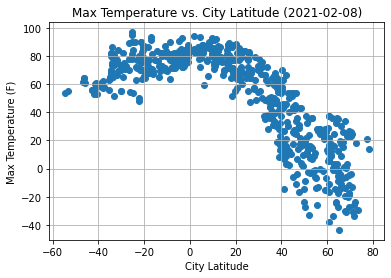

In [15]:
plt.scatter(weather_570["Lat"], weather_570["Max_Temp"])
plt.grid(True)
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Max Temperature vs. City Latitude ({sdt2})")
plt.show()

### Here we sought to understand the distribution pattern and any possible relationship between Max Temperature and the City Latitude on the day data was pulled.

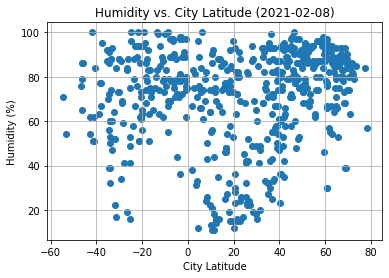

In [16]:
plt.scatter(weather_570["Lat"], weather_570["Humidity"])
plt.grid(True)
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity vs. City Latitude ({sdt2})")
plt.show()

### Here we sought to understand the distribution pattern and any possible relationship between Humidity and the City Latitude on the day data was pulled.

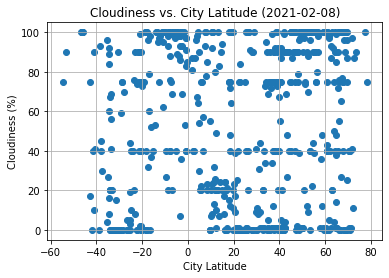

In [31]:
plt.scatter(weather_570["Lat"], weather_570["Cloudiness"])
plt.grid(True)
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness vs. City Latitude ({sdt2})")
plt.show()

### Here we sought to understand the distribution pattern and any possible relationship between Cloudiness and the City Latitude on the day data was pulled.

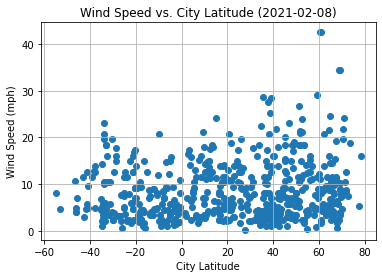

In [18]:
plt.scatter(weather_570["Lat"], weather_570["Wind_Speed"])
plt.grid(True)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs. City Latitude ({sdt2})")
plt.show()

### Here we sought to understand the distribution pattern and any possible relationship between Wind Speed and the City Latitude on the day data was pulled.

## Linear Regression

In [19]:
#Northern Hemisphere
NH=weather_570[weather_570["Lat"]>=0]
NH.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,39.586782,10.650805,38.707675,69.360000,51.037500,9.082900,1.612780e+09
std,19.737441,87.209370,34.376691,23.327684,39.299966,6.694574,8.779522e+01
min,1.613600,-173.300000,-43.600000,11.000000,0.000000,0.160000,1.612780e+09
25%,22.170675,-71.412675,12.350000,55.750000,8.000000,3.995000,1.612780e+09
50%,40.422650,19.080150,39.200000,77.000000,48.500000,7.565000,1.612780e+09
75%,56.125750,80.254150,69.785000,87.000000,90.000000,12.645000,1.612780e+09
max,78.218600,179.316700,94.350000,100.000000,100.000000,42.570000,1.612780e+09


In [20]:
#Southern Hemisphere
SH=weather_570[weather_570["Lat"]<0]
SH.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,-20.630411,23.209489,74.039425,73.977011,56.436782,7.046379,1.612780e+09
std,13.031262,91.132273,10.198696,17.944344,38.601177,4.988297,9.410525e+01
min,-54.800000,-175.200000,47.980000,16.000000,0.000000,0.470000,1.612780e+09
25%,-31.666675,-54.809550,68.000000,63.000000,20.000000,3.440000,1.612780e+09
50%,-20.375450,19.908150,75.200000,76.000000,69.000000,5.405000,1.612780e+09
75%,-8.791350,118.136600,81.397500,88.000000,96.000000,9.900000,1.612780e+09
max,-0.600000,173.166700,96.800000,100.000000,100.000000,23.020000,1.612780e+09


In [21]:
print(len(NH))
print(len(SH))

400
174


The correlation between maximum temperature (F) and city latitude is: -0.868


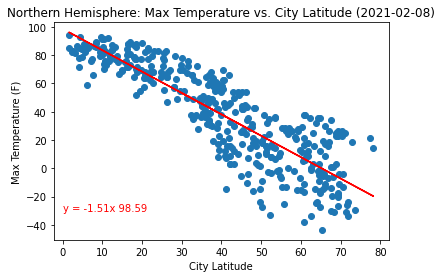

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH["Lat"], NH["Max_Temp"])
rvalue1=round(rvalue,3)
regress_values = NH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(NH["Lat"], NH["Max_Temp"])
plt.plot(NH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=10,color="red")
#plt.ylim(-60,120)
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere: Max Temperature vs. City Latitude ({sdt2})")
print(f"The correlation between maximum temperature (F) and city latitude is: {rvalue1}")
plt.show()

The correlation between maximum temperature (F) and city latitude is: 0.511


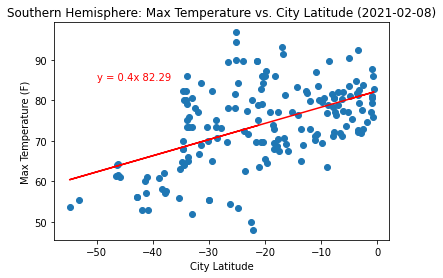

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH["Lat"], SH["Max_Temp"])
rvalue1=round(rvalue,3)
regress_values = SH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(SH["Lat"], SH["Max_Temp"])
plt.plot(SH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere: Max Temperature vs. City Latitude ({sdt2})")
#plt.ylim(40,100)
print(f"The correlation between maximum temperature (F) and city latitude is: {rvalue1}")
plt.show()

### Observation 1: The linear regression and the scatter plots above show that the Max Temperature of a city is relating to it's latitude. In the northern hemisphere, cities with a higher latitude tend to have a lower temperature when comparing to cities with a lower latitude (r=-0.9). In the southern hemisphere, cities with a more negative latitude tend to have a lower temperature (r=0.5).

The correlation between humidity (%) and city latitude is: 0.408


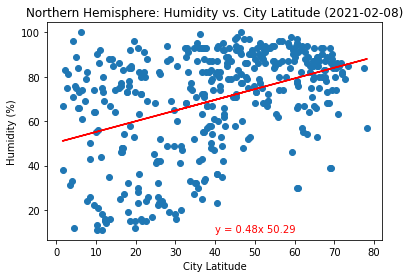

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH["Lat"], NH["Humidity"])
rvalue1=round(rvalue,3)
regress_values = NH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(NH["Lat"], NH["Humidity"])
plt.plot(NH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: Humidity vs. City Latitude ({sdt2})")
print(f"The correlation between humidity (%) and city latitude is: {rvalue1}")
plt.show()

The correlation between humidity (%) and city latitude is: 0.268


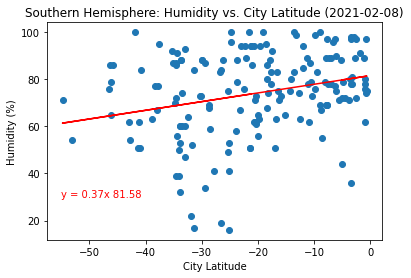

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH["Lat"], SH["Humidity"])
rvalue1=round(rvalue,3)
regress_values = SH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(SH["Lat"], SH["Humidity"])
plt.plot(SH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: Humidity vs. City Latitude ({sdt2})")
#plt.ylim(40,100)
print(f"The correlation between humidity (%) and city latitude is: {rvalue1}")
plt.show()

### Observation 2: The linear regression and the scatter plots above show that the relationship of Humidity and its latitude was not as strong as that observed in Max Temperature vs. City Latitude. In the northern hemisphere, cities with a higher latitude tend to have a higher humidity when comparing to cities with a lower latitude (r=0.4). In the southern hemisphere, cities with a more negative latitude tend to have a bit lower temperature (r=0.3). However, their r values are relatively low (<0.5).

The correlation between cloudiness (%) and city latitude is: 0.182


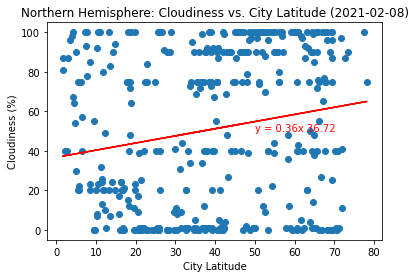

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH["Lat"], NH["Cloudiness"])
rvalue1=round(rvalue,3)
regress_values = NH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(NH["Lat"], NH["Cloudiness"])
plt.plot(NH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere: Cloudiness vs. City Latitude ({sdt2})")
print(f"The correlation between cloudiness (%) and city latitude is: {rvalue1}")
plt.show()

The correlation between cloudiness (%) and city latitude is: 0.36


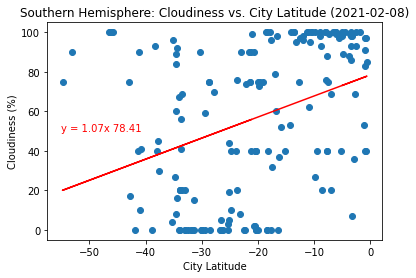

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH["Lat"], SH["Cloudiness"])
rvalue1=round(rvalue,3)
regress_values = SH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(SH["Lat"], SH["Cloudiness"])
plt.plot(SH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere: Cloudiness vs. City Latitude ({sdt2})")
#plt.ylim(40,100)
print(f"The correlation between cloudiness (%) and city latitude is: {rvalue1}")
plt.show()

### Observation 3: The linear regression and the scatter plots above show that the Cloudiness may not have a strong direct relationship with its latitude when comparing with that between Max Temperature and City Latitude. Similar observations obtained from both the northern and southern hemisphere, although the cloudiness % tends to be more positively relating to the City Latitude in southern hemisphere (r=0.4) when comparing with that in northern hemisphere (r=0.2).

The correlation between wind speed (mph) and city latitude is: 0.08


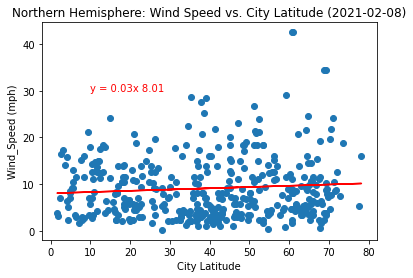

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(NH["Lat"], NH["Wind_Speed"])
rvalue1=round(rvalue,3)
regress_values = NH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(NH["Lat"], NH["Wind_Speed"])
plt.plot(NH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.title(f"Northern Hemisphere: Wind Speed vs. City Latitude ({sdt2})")
print(f"The correlation between wind speed (mph) and city latitude is: {rvalue1}")
plt.show()

The correlation between wind speed (mph) and city latitude is: -0.205


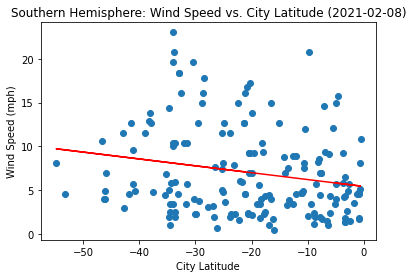

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(SH["Lat"], SH["Wind_Speed"])
rvalue1=round(rvalue,3)
regress_values = SH["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(SH["Lat"], SH["Wind_Speed"])
plt.plot(SH["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=10,color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere: Wind Speed vs. City Latitude ({sdt2})")
#plt.ylim(40,100)
print(f"The correlation between wind speed (mph) and city latitude is: {rvalue1}")
plt.show()

### Observation 4: The linear regression and the scatter plots above show that the Wind Speed do not have a strong direct relationship with its latitude when comparing with that between Max Temperature and City Latitude. Similar observations obtained from both the northern and southern hemisphere.

## Observation 5: In addition to the above, I have conducted the following correlation matrices to explore any other possible correlations between the different weather variables (and possible factors) considered in this dataset. The correlation matrix of both the northern hemisphere and southern hemisphere show negative correlations between the Max Temperature and Humidity (r>-0.4). 

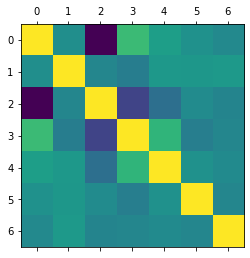

In [32]:
plt.matshow(NH.corr())
plt.show()

In [34]:
corrNH=NH.corr()
corrNH.style.background_gradient(cmap='coolwarm', axis=None)

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
Lat,1.000000,0.052265,-0.868473,0.407653,0.181618,0.079550,0.012146
Lng,0.052265,1.000000,-0.011040,-0.079049,0.131254,0.119338,0.132558
Max_Temp,-0.868473,-0.011040,1.000000,-0.488883,-0.183855,0.032238,-0.021851
Humidity,0.407653,-0.079049,-0.488883,1.000000,0.354578,-0.066436,-0.010888
Cloudiness,0.181618,0.131254,-0.183855,0.354578,1.000000,0.077367,0.026363
Wind_Speed,0.079550,0.119338,0.032238,-0.066436,0.077367,1.000000,-0.008353
Date,0.012146,0.132558,-0.021851,-0.010888,0.026363,-0.008353,1.000000


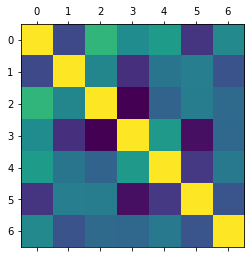

In [33]:
plt.matshow(SH.corr())
plt.show()

In [35]:
corrSH=SH.corr()
corrSH.style.background_gradient(cmap='coolwarm', axis=None)

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
Lat,1.000000,-0.112644,0.510891,0.267788,0.359614,-0.204757,0.242227
Lng,-0.112644,1.000000,0.225249,-0.233540,0.128178,0.181738,-0.060454
Max_Temp,0.510891,0.225249,1.000000,-0.427833,0.025313,0.178817,0.067079
Humidity,0.267788,-0.233540,-0.427833,1.000000,0.346382,-0.368081,0.055929
Cloudiness,0.359614,0.128178,0.025313,0.346382,1.000000,-0.191970,0.150937
Wind_Speed,-0.204757,0.181738,0.178817,-0.368081,-0.191970,1.000000,-0.049818
Date,0.242227,-0.060454,0.067079,0.055929,0.150937,-0.049818,1.000000
